# Visualización y entrenamiento de un modelo de Regresión lineal con scikit-learn

## Importando dependencias

In [ ]:
import pandas as pd # Manejo de datos
import seaborn as sns # Creación de gráficas y visualización de datos
import matplotlib.pyplot as plt # Dependencia para crear gráficos

## Explorando nuestro set de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Leer el archivo csv

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/regresion lineal/studentsperformance_15085fee-8bc7-4d33-a182-655428728fe1.csv")

In [ ]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### Creando un histograma

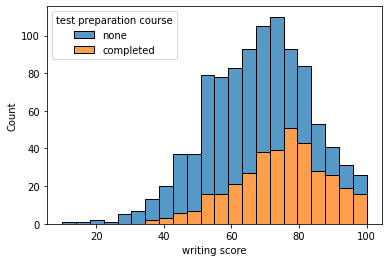

In [ ]:
sns.histplot(data=df,x='writing score',hue='test preparation course',multiple="stack")#permite graficar un ihistograma

### Visualizando nuestros datos

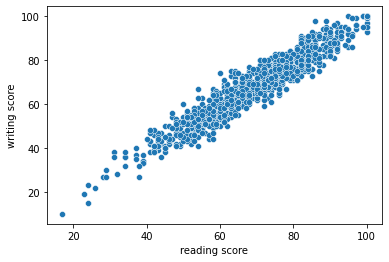

In [ ]:
sns.scatterplot(data=df,x= 'reading score',y='writing score')#visualizar datos , grafico de dispersion#si queremos mostrar las graficas en el desde un interprete local debemos hacerlo con plt.show

### Creando una tabla de frecuencias

In [ ]:
freq= df["writing score"].value_counts()#va a contar los valores que contiene la columna
df_freq=freq.to_frame()#transforma a un data frame
df_freq.reset_index(inplace=True)#resetea los indices,inplace =true nos indica que queremos que los indices los quiera dentro del dataframe
df_freq=df_freq.rename(columns={"index":"writing score","writing score":"number of students"})#renombra los nombres de las columnas
df_freq

,writing score,number of students
0,74,35
1,70,33
2,68,31
3,73,28
4,62,27
...,...,...
72,23,1
73,22,1
74,19,1
75,15,1


### Promedio de los puntajes

In [ ]:
df.mean()#va a calcular el promedio de todos los datos de tipo numerico

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

### Mediana de los puntajes

In [ ]:
df.median()#calcula la mediana de los datos de tipo numerico

math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

## Entrenando nuestro modelo

***x*** será el puntaje de lectura
y ***y*** sera el puntaje de escritura

Suponemos que si obtienen un buen puntaje en el test de lectura deben obtener un mayor puntaje en el test escritura

In [ ]:
X=df["reading score"].values #muestra solo los valores sin indices
Y=df["writing score"].values #muestra solo los valores sin indices
X=X.reshape(-1,1)#reorganizamos nuestros datos para pasarlos para entrenar
from sklearn.model_selection import train_test_split#libreria para hacer machine learning
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)# va a dividir nuestros datos en entrenamiento y prueba

In [ ]:
#regrsion lineal
from sklearn.linear_model import  LinearRegression
reg= LinearRegression() #guarda el modelo de una regresion lineal


reg.fit(X_train,Y_train)#entrana la regresion con nuestros datos
print("la pendiente es :", reg.coef_)
print("El bias es :", reg.intercept_)
print(reg.score(X_train,Y_train))# nos dice el valor que tan relacionadas se encuentran las variables

la pendiente es : [0.99507925]
El bias es : -0.7424012090005618
0.9110694036658226


## Visualización de nuestro modelo entrenado

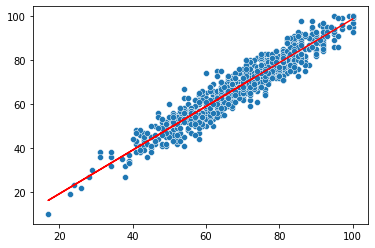

In [ ]:
x_flat=X_train.flatten()#lo vuelve un arreglo
y_hat=reg.predict(X_train)
fig, ax=plt.subplots()
sns.scatterplot(x=x_flat,y=Y_train)
plt.plot(X_train,y_hat,color="r")

## Evaluación de nuestro modelo

In [ ]:
from sklearn.metrics import mean_squared_error # voya aimportar una libreria de metricas

y_pred=reg.predict(X_test)
#calcular el mean squared error 
print(mean_squared_error(Y_test,y_pred))

19.86413992949986


In [ ]:
values=pd.DataFrame({"Actual_test":Y_test.flatten(),"Predict":y_pred.flatten()})
values

,Actual_test,Predict
0,87,92.795049
1,70,73.888543
2,50,52.991878
3,67,66.922988
4,59,56.972195
...,...,...
195,66,64.932829
196,85,85.829494
197,68,71.898384
198,41,42.046007
